**GRIP:THE SPARKS FOUNDATION**




   Data Science and Business Analytics Intern
*   Task 2 : Predicting using unsupervised ML
*   Author : K.AR.Raghuvardhan
*   Problem statement : From the ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.





**STEP1 : Importing all the necessary modules**

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


**STEP2 : Understanding about  data (Meta data)**

In [38]:
data=pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [83]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [84]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**STEP3: Finding no .of clusters (Elbow method)**



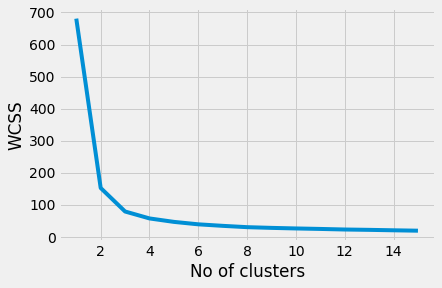

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.06387443273313,
 27.842356060606072,
 26.04820224804435,
 24.53046205587498,
 22.75855952380953,
 21.674776515151514,
 20.300946969696973,
 19.0484107004107]

In [78]:
x=data.iloc[:,[1,2,3,4]].values
wcss=[]
for i in range(1,16):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()
wcss



 **Silhouette coefficient method** 

In [81]:
sc=[]
for i in range(2,11):
   kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0 )
   kmeans.fit(x)
   score = silhouette_score(x, kmeans.labels_)
   sc.append(score)



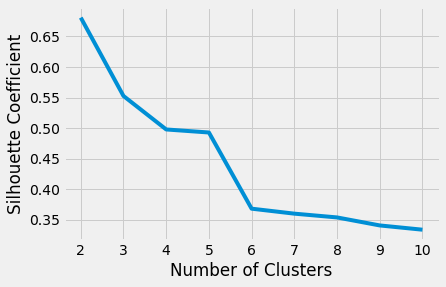

[0.6808136202936816,
 0.5525919445499757,
 0.4978256901095472,
 0.49285559183161204,
 0.36820569682713084,
 0.3600597997328459,
 0.3538815380353622,
 0.3407785831583716,
 0.33380799465469013]

In [86]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sc)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
sc

In [62]:
kmeans=KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**STEP4 : Data vizualization**



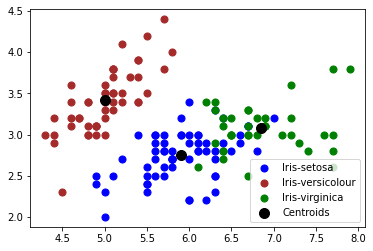

In [65]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],  s = 50, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

So,the total number of clusters are **3**